In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 


In [2]:
house_data = pd.read_csv('datasets_housing.csv')


In [3]:
print(house_data.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [5]:
house_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
house_data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [31]:
house_data = house_data.fillna(0)

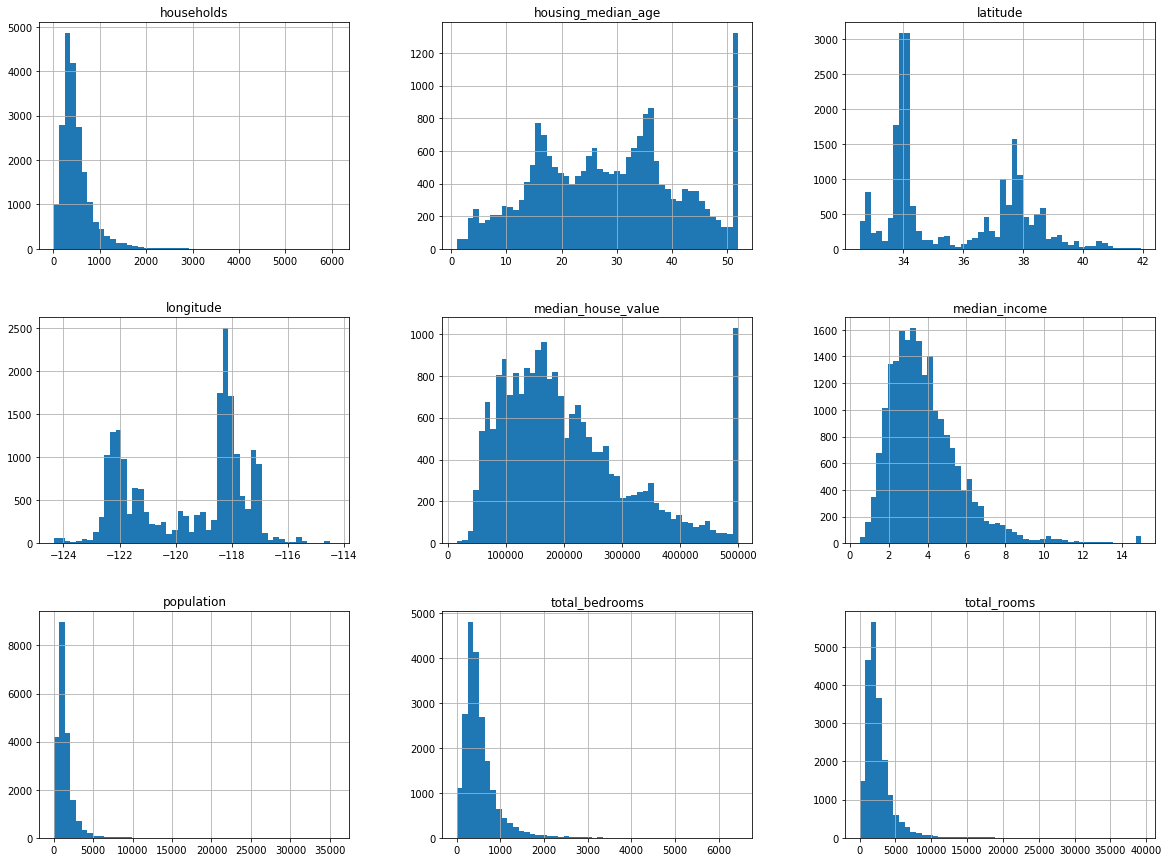

In [32]:
%matplotlib inline
# graphical representation of the dataset(numerical attributes)
house_data.hist(bins=50,figsize=(20,15))
plt.show()

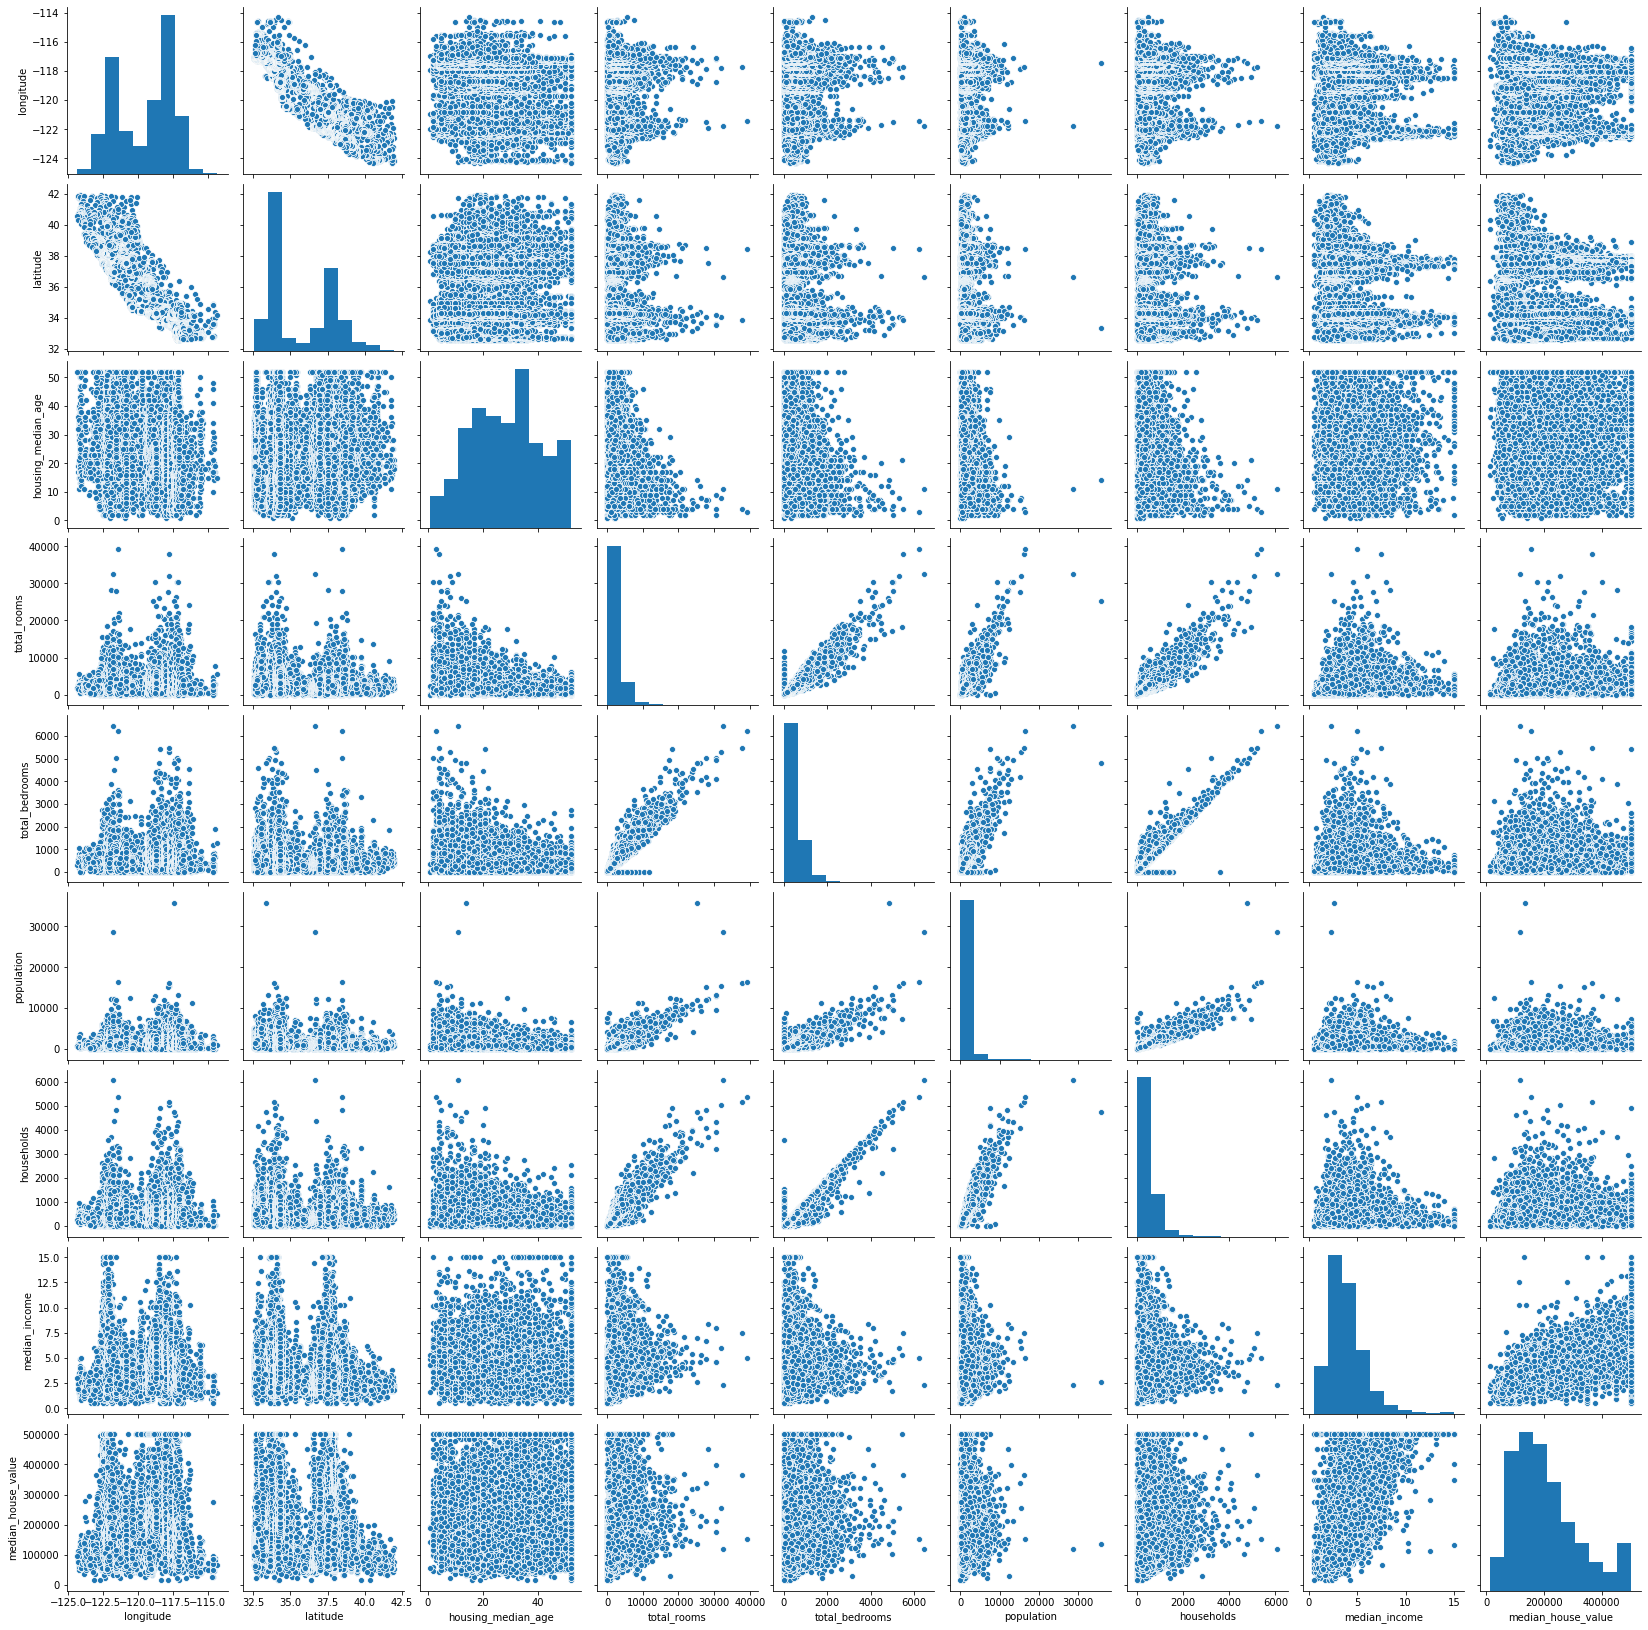

In [33]:
sns.pairplot(house_data)

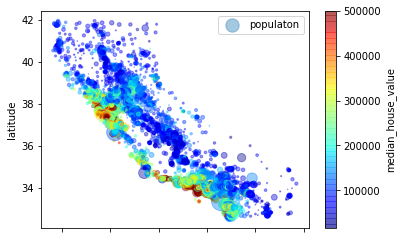

In [34]:
# Visualization between population and prices
house_data.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4,
                     s=house_data['population']/100,label='populaton',
                     c='median_house_value',cmap=plt.get_cmap('jet'),colorbar=True)
plt.legend()

In [18]:
# Correlation matrix
cor_matrix=house_data.corr()
print(cor_matrix)


                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_

Text(0.5, 1, 'Correlation Matrix')

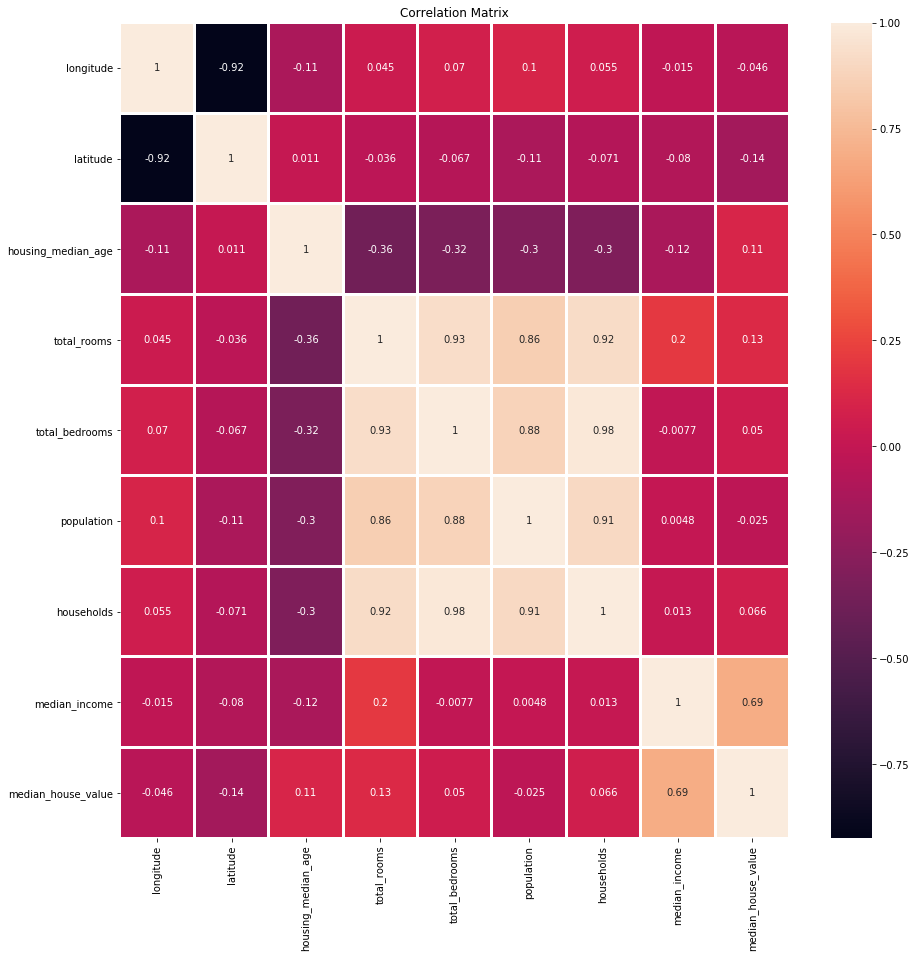

In [35]:
# correlation matrix
import seaborn as sns
f,ax=plt.subplots(figsize=(15,15))
sns.heatmap(cor_matrix,linewidths=2.0,ax=ax,annot=True)
ax.set_title('Correlation Matrix')

In [36]:
prices = house_data['median_house_value']
features = house_data.drop(['median_house_value','ocean_proximity'], axis = 1)

In [37]:
# splitting data X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split
# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state = 42)


In [44]:
from sklearn.linear_model import LinearRegression
lg=LinearRegression()
clf=lg.fit(X_train,y_train)
y_predlreg = clf.predict(X_test)


In [62]:
#RMSE(root mean squared error)
from sklearn.metrics import mean_squared_error
lg_mse=mean_squared_error(y_test, y_predlreg)
lg_rmse=np.sqrt(lg_rmse)
lg_rmse

77849.05682601043

In [50]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

tree_reg=DecisionTreeRegressor()
tree_reg.fit(X_train,y_train)
clf_tree =tree_reg.predict(X_test)


In [52]:
#RMSE
tree_rmse=mean_squared_error(y_test,clf_tree)
tree_rmse

4985658595.444525

In [53]:
#Random forest regressor 

from sklearn.ensemble import RandomForestRegressor

forest_reg=RandomForestRegressor()
forest_reg.fit(X_train,y_train)
clf_rf =forest_reg.predict(X_test)

In [63]:
#RMSE
tree_mse=mean_squared_error(y_test,clf_rf)
rf_rmse=np.sqrt(tree_mse)
rf_rmse

50149.54976711041

In [64]:
# Support vector machines

from sklearn.svm import SVR

svm_reg=SVR()
svm_reg.fit(X_train,y_train)
clf_svm=svm_reg.predict(X_test)


In [65]:
svm_mse=mean_squared_error(y_test,clf_svm)
svm_rmse=np.sqrt(svm_mse)
svm_rmse

117217.23666039878

In [70]:
#KNN Regressor
from sklearn import neighbors

rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K, weights='distance', algorithm='auto', p=1, metric='minkowski')

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = np.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 137824.7817391999
RMSE value for k=  2 is: 119290.98495306181
RMSE value for k=  3 is: 112501.21702220986
RMSE value for k=  4 is: 108741.04429127449
RMSE value for k=  5 is: 106409.14042710843
RMSE value for k=  6 is: 105052.81524091733
RMSE value for k=  7 is: 103798.51254518956
RMSE value for k=  8 is: 103034.82190618047
RMSE value for k=  9 is: 102409.99943959617
RMSE value for k=  10 is: 101887.46666943535
RMSE value for k=  11 is: 101531.06715490819
RMSE value for k=  12 is: 101493.80988635437
RMSE value for k=  13 is: 101326.18374157717
RMSE value for k=  14 is: 100928.63011432202
RMSE value for k=  15 is: 100669.56691029781
RMSE value for k=  16 is: 100531.6453606222
RMSE value for k=  17 is: 100456.55372153455
RMSE value for k=  18 is: 100387.01643425586
RMSE value for k=  19 is: 100416.47378078547
RMSE value for k=  20 is: 100430.57121219682


In [91]:
##ANN

from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor()
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)



In [92]:
#print(np.sqrt(mean_squared_error(y, y_pred)))

nn_mse=mean_squared_error(y_test,y_pred)
nn_rmse=np.sqrt(svm_mse)
nn_rmse

110833.43284051924